<h1><center style="color:#221C70">Cluster Analysis On Mall DataSet<center></h1><hr>

### [ This code is developed by Krushna Prasad Sahoo]
 

### 1. Explantion

   - 1 Mg Mall have kept a record of their customers and have created a dataset that contains each customer’s age, sex, annual income and a spending score (a numerical value between 1 and 100 that depicts the customer’s spending ability) . They want to know what the different types of customers that visit them are.<br/>
   - Cluster Analysis can proved to be insightful.

### 2. Importing necessary Modules

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Loading the DataSet

In [9]:
dataset = pd.read_csv("tenovia.csv")
print(dataset.head(10))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72


### 4. Exploring the Dataset

In [10]:
print(dataset.info)
print("-----------------------------------------------------------------------------------------------------------------")
print(dataset.describe())

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>
-------------------------------------------------------------------

<br/><hr/>INSIGHTS :<br/>
    &nbsp;&nbsp;&nbsp;-&nbsp;  There are 200 rows and 5 columns .<br/>
    &nbsp;&nbsp;&nbsp;-&nbsp;  Except Gender all are of interger type .<hr/>

In [11]:
# let's get the integer part i.e Annual Income & Spending Score for comparision and visualisation

In [12]:
data_comparision = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

In [14]:
data_comparision.head(10)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


### 5. Data Visualisation

In [45]:
# let's visualise first at the customers with respect to their Annual Income & Spending Score 

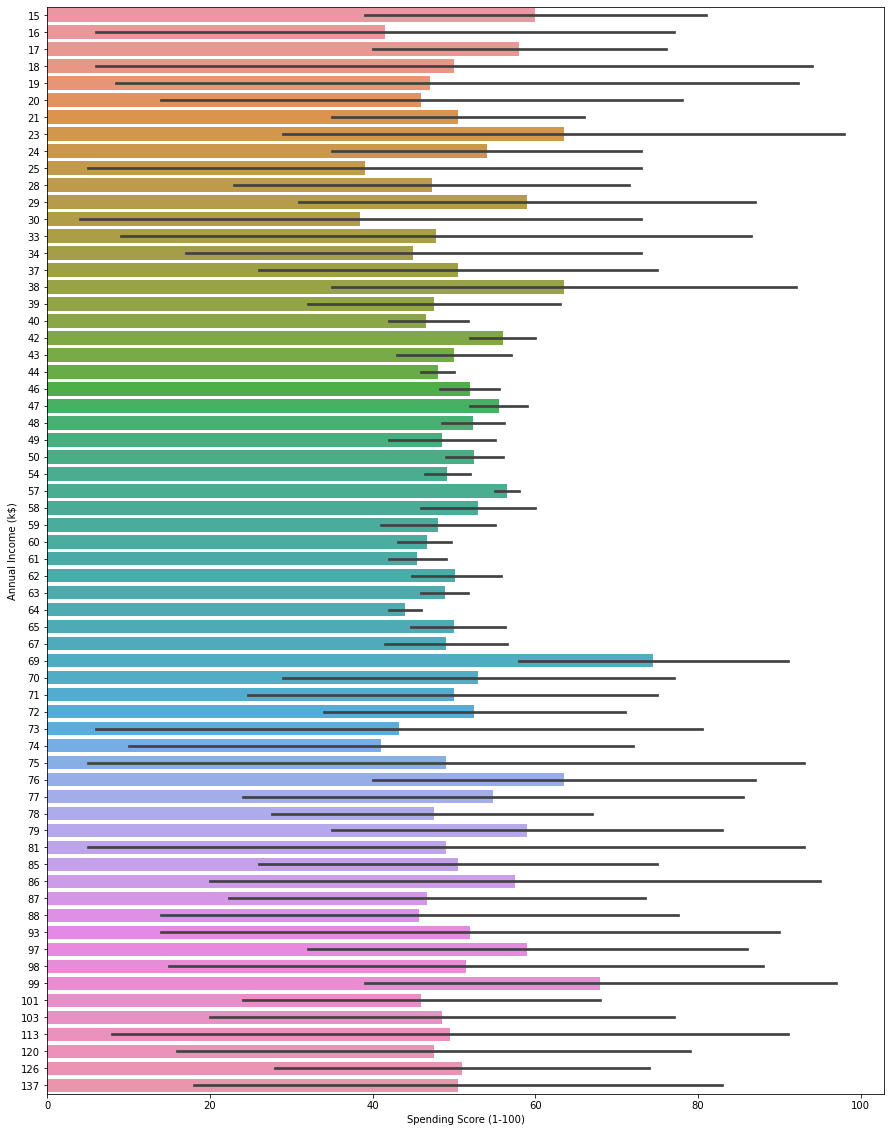

In [46]:
df_top = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].sort_values('Spending Score (1-100)', ascending = False)[:200]
fig, ax = plt.subplots(figsize = (15, 20))
sns.barplot(y = 'Annual Income (k$)', x = 'Spending Score (1-100)', data = df_top, orient = 'h',ax = ax)

In [47]:
# let's have a look at the distribution of Annual Income with respect to Spending Score

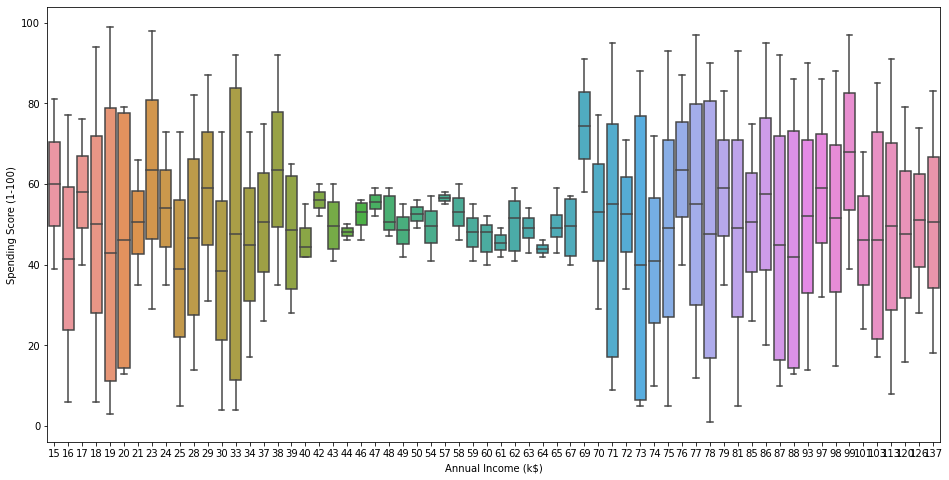

In [48]:
fig, ax = plt.subplots(figsize = (16 , 8))
sns.boxplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = data_comparision, ax = ax)

In [49]:
# let's have a look at the correlation matrix .

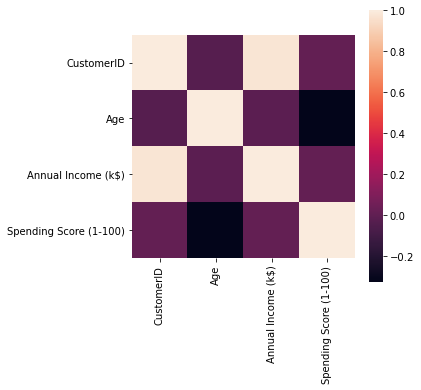

In [50]:
corrmat = dataset.corr()
fig = plt.figure(figsize=(5,5))
sns.heatmap(corrmat , vmax= 1 , square= True)
plt.show()

### 6. Clusters

In [51]:
# let's use scatterplot of seaborn module for the cluster .

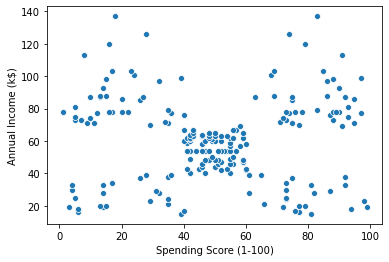

In [52]:
sns.scatterplot(x = 'Spending Score (1-100)', y = 'Annual Income (k$)', data = data_comparision)

In [53]:
# We can also do jointplot to get a cluster .

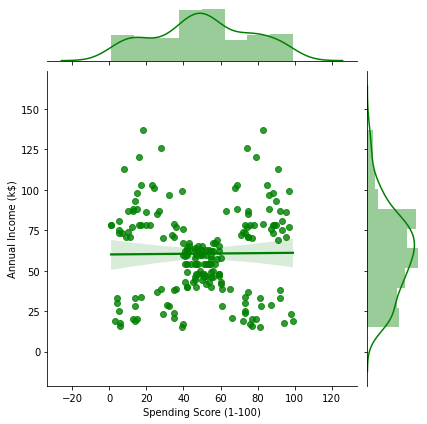

In [54]:
sns.jointplot(data_comparision["Spending Score (1-100)"],
             data_comparision["Annual Income (k$)"] ,
             kind= "regg" ,
             color="g")

In [55]:
# let's draw dendrogram to find optimal number of clusters .

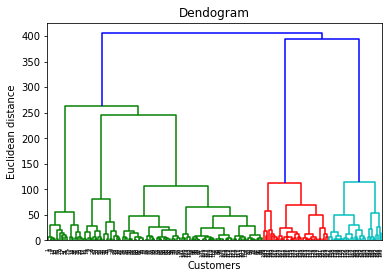

In [56]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(data_comparision , method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()


In [57]:
X = dataset.iloc[:, [3,4]].values

# let's fit the hierarchial clustering to the mall dataset .
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters= 5, affinity = 'euclidean', linkage= 'ward') 

#n_cluster is set 5 as it is optimal as shown in dendogram
y_hc= hc.fit_predict(data_comparision)


In [58]:
# let's visualise the final cluster .

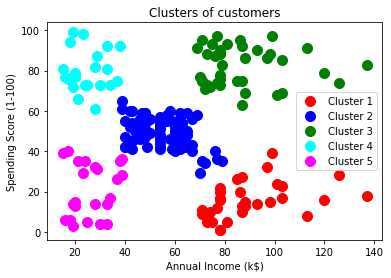

In [59]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


<br/><hr/>INSIGHTS :<br/><p>
    &nbsp;&nbsp;&nbsp;-&nbsp; All  the customers in Cluster-1 (Red Colour) spend less even though their annual income is more .  They are very careful about their total expenditure . <br/>
    &nbsp;&nbsp;&nbsp;-&nbsp;  All the customers in Cluster-2  (Royal Blue Colour) are average in both income as well as total expenditure .<br/> 
    &nbsp;&nbsp;&nbsp;-&nbsp;  All the customers in Cluster-3  (Green Colour) are actually the target customers who have high annual income and their annual expenditure is also high .<br/>
    &nbsp;&nbsp;&nbsp;-&nbsp;  All the customers in Cluster-4 (Sky Blue Colour) have low annual income still they spend more in the mall.<br/>
    &nbsp;&nbsp;&nbsp;-&nbsp;  All the customers in Cluster-5 (Pink Colour) have low income and they also spend less in the mall as expected.<hr/></p>